In [1]:
import pickle
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

ἀγαθός (good), ἀλήθεια (truth), ἀληθής (unconcealed, true), ἀρετή (virtue, moral excellence, perfection), δίκαιος (just, righteous, impartial), δίκη (justice, judicial hearing, punishment)

βία (force, violence), δεινός (fearful, terrible, dread, dire), θυμός (an outburst of passion, wrath), μάχη (strife, contention, quarrel), πόλεμος (a war, battle, strife), χαλεπός (hard, harsh, ﬁerce

In [2]:
freq_tups = pickle.load(open("../data/freqs_tups.pickle", "rb"))

In [3]:
model_vectors_loaded = KeyedVectors.load("../data/large_files/vectors_fasttext/model_full.wv")

In [4]:
print({"θεός" : model_vectors_loaded["θεός"][:5]})
print({"δίκαιος" : model_vectors_loaded["θεός"][:5]})
print({"βία" : model_vectors_loaded["θεός"][:5]})

{'θεός': array([ 0.9367211 ,  0.47715938,  0.2955201 , -1.2507528 , -0.02387684],
      dtype=float32)}
{'δίκαιος': array([ 0.9367211 ,  0.47715938,  0.2955201 , -1.2507528 , -0.02387684],
      dtype=float32)}
{'βία': array([ 0.9367211 ,  0.47715938,  0.2955201 , -1.2507528 , -0.02387684],
      dtype=float32)}


In [ ]:
{"δίκαιος" : model_vectors_loaded["θεός"][:10]}

In [5]:
model_vectors_loaded.most_similar("θεός")

[('ἐτεός', 0.8190017342567444),
 ('τεός', 0.8043358325958252),
 ('ἰατρός', 0.7662969827651978),
 ('κολωνός', 0.7587723135948181),
 ('θεαρός', 0.7583391666412354),
 ('σεμνός', 0.7576870322227478),
 ('ἁγνός', 0.7523812055587769),
 ('τρυφερός', 0.7308467030525208),
 ('γαμβρός', 0.7302103638648987),
 ('γεραιός', 0.7300339937210083)]

In [6]:
religion = ["θεός", "θεά", "εὐσεβία", 'εὐσεβής']
morality = ["ἀγαθός", "ἀρετή", "δίκαιος", "δικαιοσύνη"] #, "ἀλήθεια", "ἀληθής"]
# violence = ["βία", "δεινός", "θυμός", "χαλεπός"] #, "μάχη", "πόλεμος"]

In [7]:
def get_sim_matrix(words):
    df = pd.DataFrame(cosine_similarity(model_vectors_loaded[words]), columns=words, index=words)
    return df

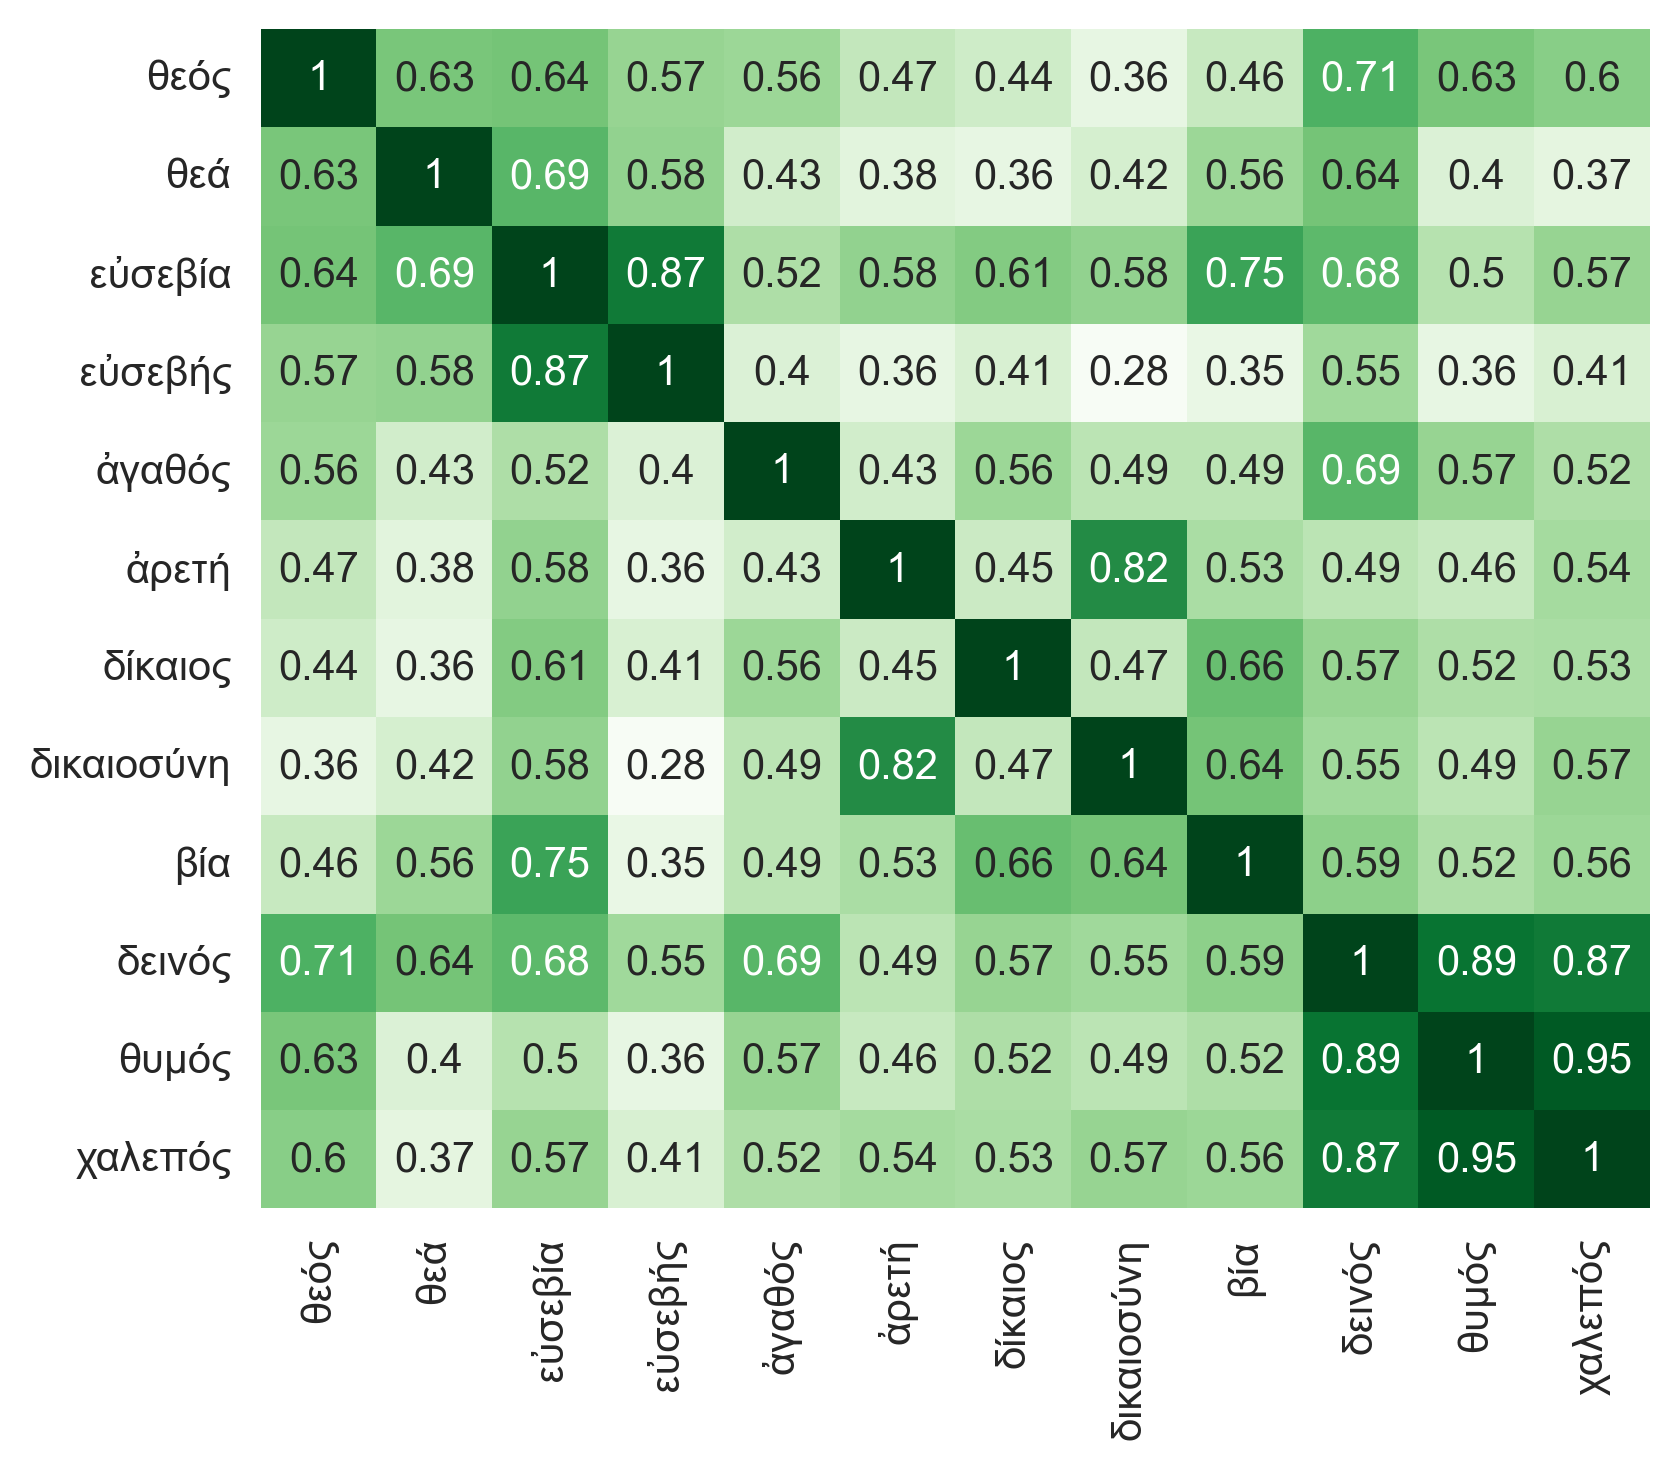

In [8]:
fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)

sim_matrix = get_sim_matrix(religion + morality + violence)

sns.heatmap(sim_matrix.round(2), annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [9]:
sns.heatmap(sim_matrix.round(2), annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("True Class")
ax.set_xlabel("Predicted Class")
plt.show()

In [10]:
model_vectors_loaded.n_similarity(religion, morality)

0.64246243

what do we measure: whether the semantic distance between two groups of words becomes higher as we exclude data from particular century, is this implies that the data from that particular century are actually responsible for the semantic relatedness between the two domains.

In [214]:
data = []
for cent in range(-8, 4):
    if cent < 0:
        cent_label = "{} BCE".format(str(abs(cent)))
    else:
        cent_label = "{} CE".format(str(cent + 1))
    model_vectors_loaded = KeyedVectors.load("../data/large_files/vectors_fasttext/model_without_{}.wv".format(str(cent)))
    rel_mor_sim = model_vectors_loaded.n_similarity(religion, morality)
    rel_viol_sim = model_vectors_loaded.n_similarity(religion, violence)
    random_words = list(np.array([el[0] for el in freq_tups if el[0] not in religion+morality+violence])[np.random.randint(0, 5000-len(religion+violence+morality), size=10)])
    rel_rand_sim = model_vectors_loaded.n_similarity(religion, random_words)
    data.append({"century" : cent,
                 "cent_label" : cent_label,
                 "rel_mor_sim" : rel_mor_sim,
                 "rel_viol_sim" : rel_viol_sim,
                 "rel_rand_sim" : rel_rand_sim})

In [215]:
data_df = pd.DataFrame(pd.DataFrame(data))
data_df

,century,cent_label,rel_mor_sim,rel_viol_sim,rel_rand_sim
0,-8,8 BCE,0.651545,0.679202,0.544150
1,-7,7 BCE,0.661180,0.692204,0.576622
2,-6,6 BCE,0.647971,0.702414,0.543846
3,-5,5 BCE,0.668424,0.697490,0.627408
4,-4,4 BCE,0.630689,0.680190,0.721366
5,-3,3 BCE,0.628443,0.684845,0.439831
6,-2,2 BCE,0.620474,0.701819,0.699750
7,-1,1 BCE,0.651136,0.699474,0.680559
8,0,1 CE,0.657634,0.698747,0.631436
9,1,2 CE,0.651031,0.699839,0.583395


In [216]:
data_df["rel_mor_sim_w"] = data_df["rel_mor_sim"] / data_df["rel_rand_sim"]
data_df["rel_viol_sim_w"] = data_df["rel_viol_sim"] / data_df["rel_rand_sim"]

In [217]:
model_vectors_loaded = KeyedVectors.load("../data/large_files/vectors_fasttext/model_full.wv")
base_rel_mor_sim = model_vectors_loaded.n_similarity(religion, morality)
base_rel_viol_sim = model_vectors_loaded.n_similarity(religion, violence)

random_words = list(np.array([el[0] for el in freq_tups if el[0] not in religion+morality+violence])[np.random.randint(0, 5000-len(religion+violence+morality), size=10)])


base_rel_rand_sim = model_vectors_loaded.n_similarity(religion, random_words)

base_rel_mor_sim_w = base_rel_mor_sim / base_rel_rand_sim
base_rel_viol_sim_w = base_rel_viol_sim / base_rel_rand_sim

Text(0.5, 0, 'century excluded from the model')

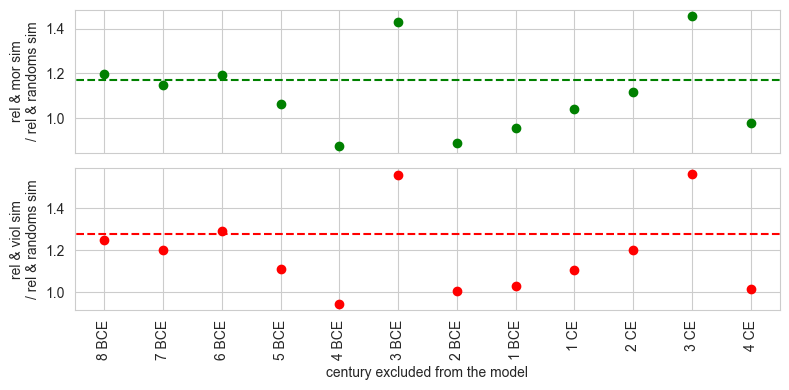

In [218]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(8,4), tight_layout=True)
ax1.scatter(data_df["century"], data_df["rel_mor_sim_w"], color="green")
ax1.hlines(y=base_rel_mor_sim_w, xmin=-10, xmax=10, color="green", linestyles="dashed")

ax1.set_xlim(-8.5,3.5)
ax1.set_xticks(data_df["century"])
ax1.set_xticklabels([])
ax1.set_ylabel("rel & mor sim\n/ rel & randoms sim")

ax2.scatter(data_df["century"], data_df["rel_viol_sim_w"], color="red")
ax2.hlines(y=base_rel_viol_sim_w, xmin=-10, xmax=10, color="red", linestyles="dashed")

ax2.set_xlim(-8.5,3.5)
ax2.set_xticks(data_df["century"])
ax2.set_xticklabels(data_df["cent_label"], rotation=90)
ax2.set_ylabel("rel & viol sim\n/ rel & randoms sim")
ax2.set_xlabel("century excluded from the model")


# Word embeddings plots

In [222]:
model_vectors_loaded = KeyedVectors.load("../data/large_files/vectors_fasttext/model_full.wv")

In [19]:
def get_tsne_coors(vectors, vocabulary, perplexity=10):
    # inverse similarity to distance
    #data = (1 - sim_matrix) / 1
    vectors = vectors.vectors
    words = vocabulary
    #data.round(5)
    # tSNE to project all words into a 2-dimensional space
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    #tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='precomputed', n_iter=5000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(vectors) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    # extract minimal and maximal values
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [20]:
vocabulary = [tup[0] for tup in freq_tups]

In [21]:
xs, ys, words = get_tsne_coors(model_vectors_loaded, vocabulary, perplexity=10)

/Users/kasev/Projects/EpiMR/epimr_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kasev/Projects/EpiMR/epimr_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [26]:
dots_idx = [word[0] for word in enumerate(words)]
dots_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


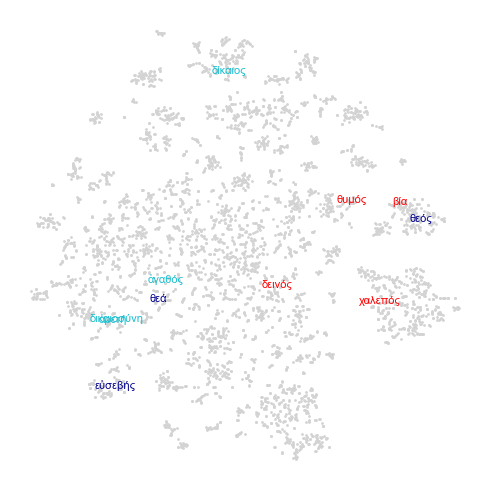

In [35]:
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)

for x, y, word in zip(xs, ys, words):
    if word in religion:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="darkblue")
    elif word in morality:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="tab:cyan")
    elif word in violence:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="red")
    else:
        ax.scatter(x, y, s=1, color="lightgrey")


ax.grid(False)
ax.set_axis_off()
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

In [36]:
model_vectors_loaded = KeyedVectors.load("../data/large_files/vectors_fasttext/model_without_-6.wv")
xs, ys, words = get_tsne_coors(model_vectors_loaded, vocabulary, perplexity=10)

/Users/kasev/Projects/EpiMR/epimr_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kasev/Projects/EpiMR/epimr_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


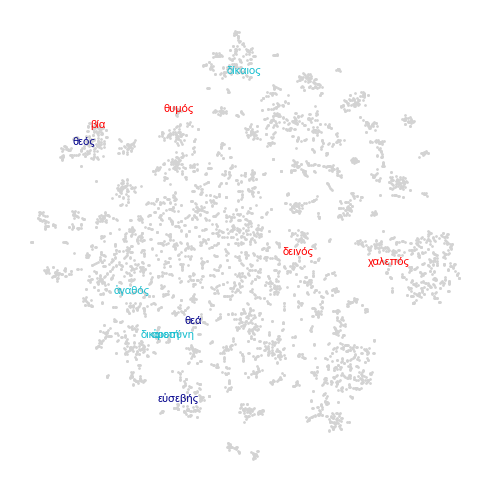

In [37]:
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)

for x, y, word in zip(xs, ys, words):
    if word in religion:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="darkblue")
    elif word in morality:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="tab:cyan")
    elif word in violence:
        ax.text(x, y, word, horizontalalignment='center', fontsize=8, color="red")
    else:
        ax.scatter(x, y, s=1, color="lightgrey")

ax.grid(False)
ax.set_axis_off()
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)